# ETS Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
sns.set_style('white')

### Simple Exponential smoothing on 'Single Family Home Sales' data

In [18]:
sfhs = pd.read_excel('datasets/single-family-home-sales.xlsx')
sfhs

,Month,Home Sales,Alpha .8,Forecast,Alpha .6,Forecast.1,Alpha .2,Forecast.2
0,1990-01,45.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02,50.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03,58.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04,52.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05,50.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-06,50.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-07,46.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-08,46.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1990-09,38.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-10,37.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
date_parse = lambda date: pd.datetime.strptime(date, '%Y-%m')
sfhs = pd.read_excel('datasets/single-family-home-sales.xlsx', parse_dates=['Month'], date_parser=date_parse)
sfhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
Month         72 non-null datetime64[ns]
Home Sales    71 non-null float64
Alpha .8      0 non-null float64
Forecast      0 non-null float64
Alpha .6      0 non-null float64
Forecast.1    0 non-null float64
Alpha .2      0 non-null float64
Forecast.2    0 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 4.6 KB


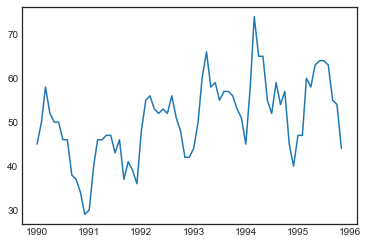

In [17]:
plt.plot(sfhs['Month'], sfhs['Home Sales'])
plt.show()

In [53]:
ts = sfhs['Home Sales'][:-1].iloc[::-1]
alpha = 0.8
pred_1_1995_12 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(ts)])

print("The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.8 is: %f" % pred_1_1995_12)

alpha = 0.6
pred_2_1995_12 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(ts)])

print("The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.6 is: %f" % pred_2_1995_12)

alpha = 0.2
pred_3_1995_12 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(ts)])

print("The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.2 is: %f" % pred_3_1995_12)

The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.8 is: 46.105470
The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.6 is: 48.683081
The predicted Sales for Dec 1995 using simple exponential smoothing with alpha = 0.2 is: 54.838020


### Holt-Winters Seasonal model

In [56]:
date_parse = lambda date: pd.datetime.strptime(date, '%b-%y')
df = pd.read_csv('datasets/sales-data.csv', parse_dates=['Month'], date_parser=date_parse)
df

,Month,Period,Sales
0,2005-03-01,0,41.7
1,2005-06-01,1,24.0
2,2005-09-01,2,32.3
3,2005-12-01,3,37.3
4,2006-03-01,4,46.2
5,2006-06-01,5,29.3
6,2006-09-01,6,36.5
7,2006-12-01,7,43.0
8,2007-03-01,8,48.9
9,2007-06-01,9,31.2


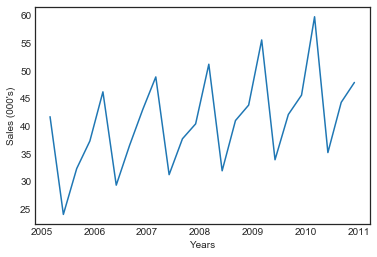

In [58]:
plt.plot(df.Month, df.Sales)
plt.xlabel("Years")
plt.ylabel("Sales (000's)")
plt.show()

There is a clear seasonal effect as well as an uptrend

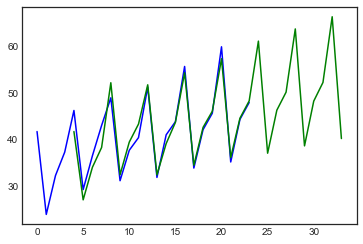

In [94]:

def holtwinters(series, alpha = 0.3, beta = 0.3, gamma = 0.3, seasonality = 4, type = "multiplicative", pred_steps = 10):
    
    # Initialisation
    level = [None]*len(series)
    trend = [None]*len(series)
    seasonal = [None]*len(series)
    forecast = [None]*(len(series) + pred_steps)
    
    for i in range(4):
        seasonal[i] = ( series[i]/np.mean(series[i:seasonality]) )
        
    level[seasonality-1] = np.mean(series[:seasonality])
    trend[seasonality-1] = 0
    
    # Holt-winters multiplicative steps
    for i in range(seasonality, len(series)):
        level[i] = alpha*(series[i]/seasonal[i-seasonality]) + (1-alpha)*(level[i-1] + trend[i-1])
        trend[i] = beta*(level[i] - level[i-1]) + (1-beta)*trend[i-1]
        seasonal[i] = gamma*(series[i]/(level[i-1] + trend[i-1])) + (1-gamma)*seasonal[i-seasonality]
        
        forecast[i] = (level[i-1] + trend[i-1])*seasonal[i-seasonality]
    
    # Make predictions
    last_index = len(series)-1
    for i in range(1,pred_steps+1):
        forecast[last_index+i] = (level[last_index] + i*trend[last_index])*seasonal[last_index-seasonality+((i-1)%seasonality)+1]
    
    return forecast


forecast = holtwinters(df.Sales, alpha = 0.3, beta = 0.3, gamma = 0.3, seasonality = 4)

plt.plot(np.arange(24), df.Sales, 'b-', np.arange(34), forecast, 'g-')
plt.show()
